In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import bokeh

In [4]:
mush = pd.read_csv('mushroom.csv')
mush['id'] = range(1, len(mush) + 1)
mush

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
0,e,x,f,n,f,n,f,w,n,b,...,w,p,NaN,n,o,p,w,v,NaN,1
1,p,NaN,y,g,t,NaN,f,c,b,k,...,n,c,p,w,n,e,NaN,y,g,2
2,e,b,y,n,t,n,f,c,NaN,n,...,p,NaN,p,w,o,p,b,y,w,3
3,e,x,g,g,t,n,f,w,b,n,...,p,NaN,p,w,n,n,NaN,NaN,d,4
4,e,NaN,f,NaN,t,n,a,w,n,n,...,NaN,w,p,w,NaN,l,w,v,d,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,NaN,r,f,n,f,NaN,n,NaN,...,n,p,p,w,o,p,k,v,NaN,25982
25982,e,f,s,e,f,NaN,f,c,n,y,...,w,p,p,w,NaN,p,r,y,d,25983
25983,p,f,g,e,NaN,NaN,a,c,b,b,...,w,NaN,p,w,o,p,h,v,m,25984
25984,e,x,g,g,t,n,f,w,b,h,...,NaN,NaN,p,w,t,e,NaN,s,NaN,25985


In [10]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,...,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,...,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


In [43]:
mush = pd.read_csv('mushroom.csv')
clase = {
    'e': 'edible',
    'p': 'poisonous'}
mush['class'] = mush['class'].map(clase)
bruise = {
    't': 'true',
    'f': 'false'}
mush['ruises'] = mush['ruises'].map(bruise)
mush_new = mush[['class', 'ruises']].groupby(by=['class', 'ruises']).size().count
print(mush_new)

<bound method Series.count of class      ruises
edible     false     6293
           true      6176
poisonous  false     6068
           true      3977
dtype: int64>


ring-type  evanescent  flaring  large  none  pendant
class                                               
edible           3351     1037   1874   938     5187
poisonous        3094      792   2079   812     3314


Text(0.5, 1.0, 'tipos de anillos')

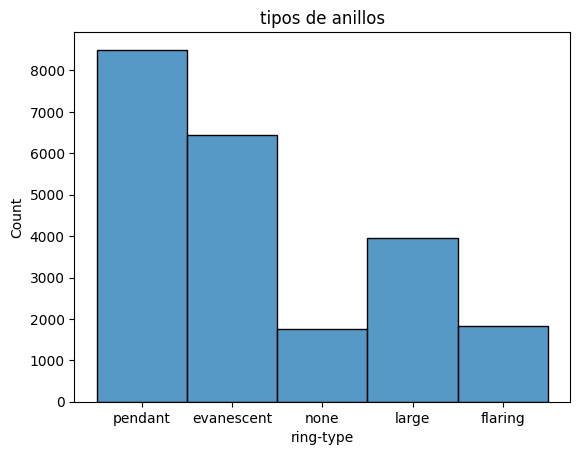

In [35]:
mush = pd.read_csv('mushroom.csv')
ring_type_mapping = {
    'c': 'cobwebby',
    'e': 'evanescent',
    'f': 'flaring',
    'l': 'large',
    'n': 'none',
    'p': 'pendant',
    's': 'sheathing',
    'z': 'zone'}
mush['ring-type'] = mush['ring-type'].map(ring_type_mapping)
clase = {
    'e': 'edible',
    'p': 'poisonous'}
mush['class'] = mush['class'].map(clase)
mush_filtered = mush.dropna(subset=['class', 'ring-type'])
conteo_clase_anillo = mush_filtered.groupby(['class', 'ring-type']).size().unstack(fill_value=0)
print(conteo_clase_anillo)
sns.histplot(data=mush, x='ring-type')
plt.title('tipos de anillos')


   habitat  count
0    woods   6573
1  grasses   4946
2    paths   3146
3   leaves   2711
4    urban   1857
5  meadows   1708
6    waste   1561


<Axes: xlabel='habitat', ylabel='count'>

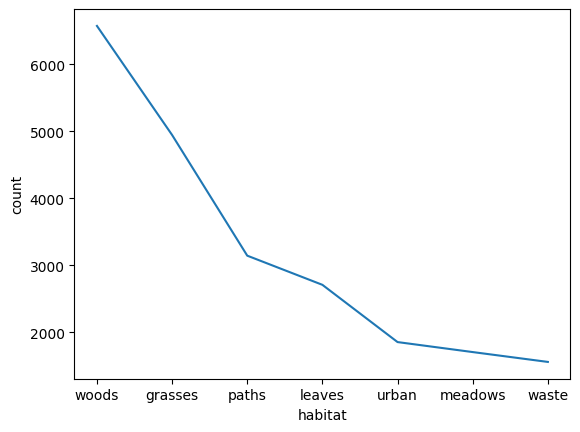

In [40]:
habitat = {
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'}
mush['habitat'] = mush['habitat'].map(habitat)
countsHabitat = mush['habitat'].value_counts().reset_index()
countsHabitat.columns = ['habitat', 'count']
print(countsHabitat)
sns.lineplot(data=countsHabitat, x="habitat", y="count", markers=True, dashes=False)

<bound method Series.count of ring-number  class    
none         edible       1540
             poisonous    1329
one          edible       8610
             poisonous    7103
two          edible       2258
             poisonous    1657
dtype: int64>


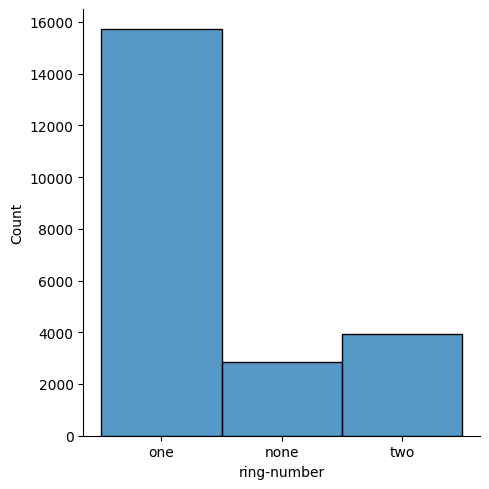

In [45]:
mush = pd.read_csv('mushroom.csv')
ring = {
    'n': 'none',
    'o': 'one',
    't': 'two'}
mush['ring-number'] = mush['ring-number'].map(ring)
clase = {
    'e': 'edible',
    'p': 'poisonous'}
mush['class'] = mush['class'].map(clase)
ring = mush[['ring-number', 'class']].groupby(by=['ring-number', 'class']).size().count
print(ring)
sns.displot(data=mush, x="ring-number")

<bound method Series.count of population
abundant     1993
clustered    2031
numerous     2110
scattered    3621
several      8409
solitary     4311
dtype: int64>


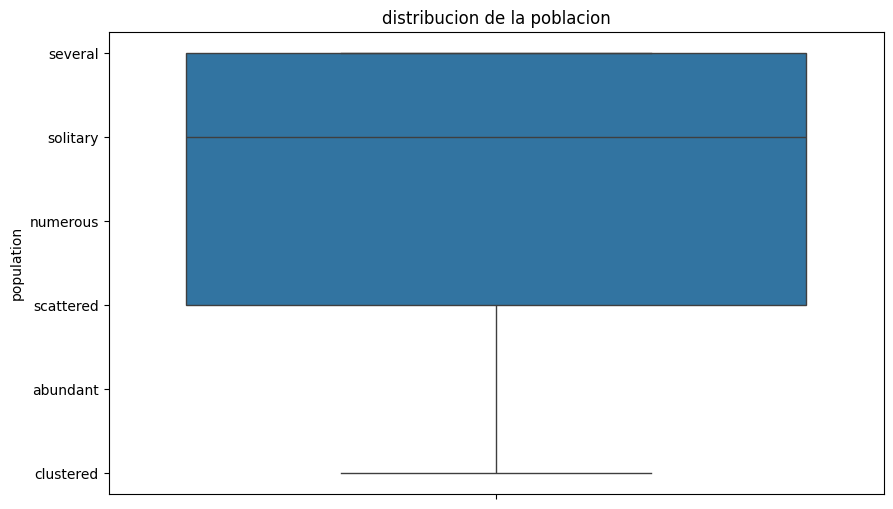

In [27]:
mush = pd.read_csv('mushroom.csv')
poblacion = {
    'a': 'abundant',
    'c': 'clustered',
    'n': 'numerous',
    's': 'scattered',
    'v': 'several',
    'y': 'solitary'}
mush['population'] = mush['population'].map(poblacion)
mush_new = mush[['population']].groupby(by=['population']).size().count
print(mush_new)
plt.figure(figsize=(10, 6))
sns.boxplot(data= mush['population'])
plt.title("distribucion de la poblacion")
plt.show()

habitat  grasses  leaves  meadows  paths  urban  waste  woods
class                                                        
e           2823    1383      974   1604    959    905   3768
p           2123    1328      734   1542    898    656   2805


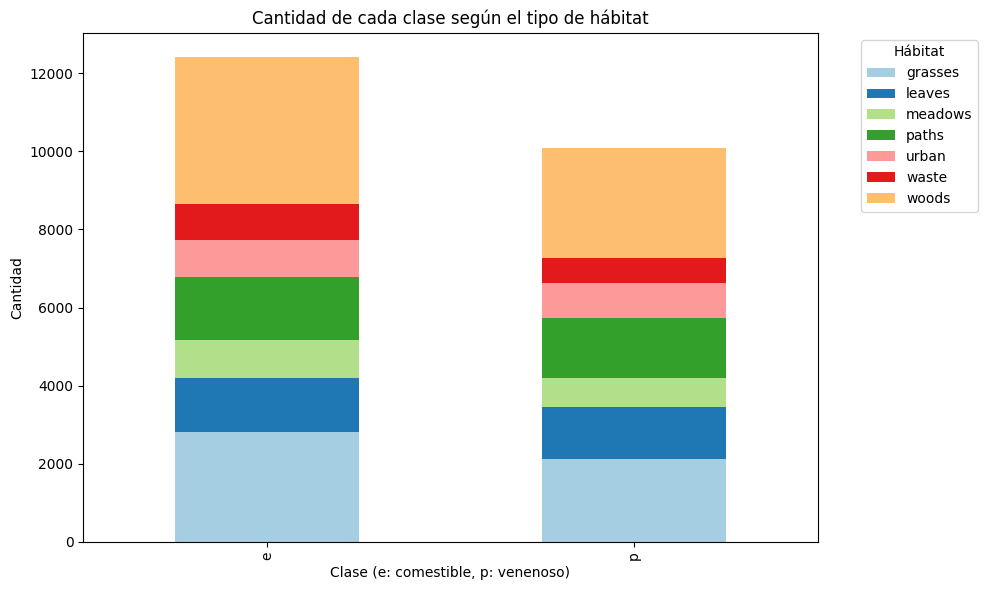

In [11]:
mush = pd.read_csv('mushroom.csv')
habitat = {
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'}
mush['habitat'] = mush['habitat'].map(habitat)
mush_filtered = mush.dropna(subset=['class', 'habitat'])
conteo_clase_habitat = mush_filtered.groupby(['class', 'habitat']).size().unstack(fill_value=0)
conteo_clase_habitat.plot(kind='bar', stacked=True, figsize=(10,6), color=plt.cm.Paired.colors)
print(conteo_clase_habitat)
plt.title('Cantidad de cada clase según el tipo de hábitat')
plt.xlabel('Clase (e: comestible, p: venenoso)')
plt.ylabel('Cantidad')
plt.legend(title='Hábitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

class
e    14354
p    11632
Name: count, dtype: int64


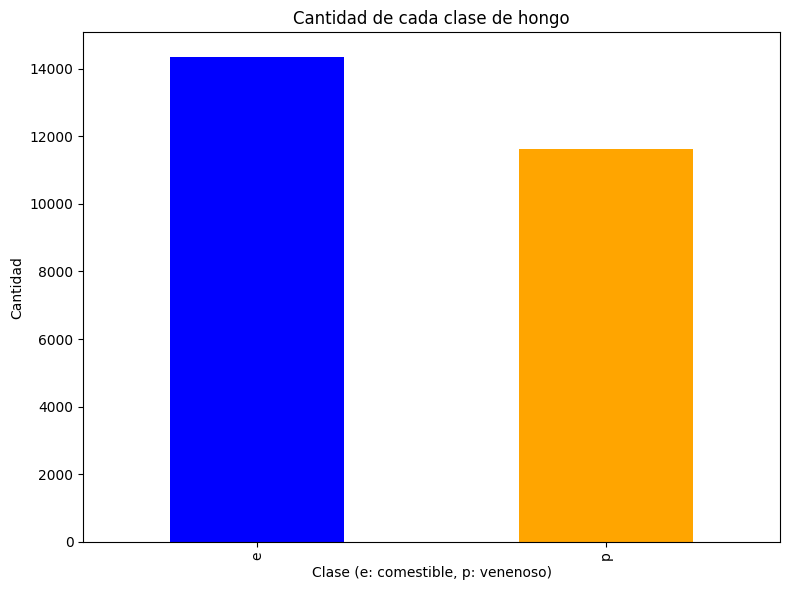

In [12]:
import matplotlib.pyplot as plt
mush = pd.read_csv('mushroom.csv')

conteo_clase = mush['class'].value_counts()
conteo_clase.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Cantidad de cada clase de hongo')
plt.xlabel('Clase (e: comestible, p: venenoso)')
plt.ylabel('Cantidad')
print(conteo_clase)
plt.tight_layout()
plt.show()

   class population  Cantidad
0      e   abundant      1163
1      e  clustered      1141
2      e   numerous      1246
3      e  scattered      2061
4      e    several      4260
5      e   solitary      2551
6      p   abundant       830
7      p  clustered       890
8      p   numerous       864
9      p  scattered      1560
10     p    several      4149
11     p   solitary      1760


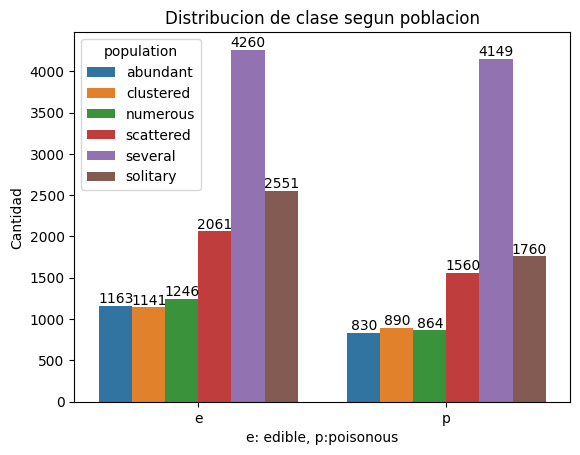

In [46]:
mush = pd.read_csv('mushroom.csv')
poblacion = {
    'a': 'abundant',
    'c': 'clustered',
    'n': 'numerous',
    's': 'scattered',
    'v': 'several',
    'y': 'solitary'}
mush['population'] = mush['population'].map(poblacion)
mush_poblacion = mush[['class', 'population']].groupby(by=['class','population']).size().reset_index(name='Cantidad')
print(mush_poblacion)
ax = sns.barplot(x='class', y='Cantidad', hue='population', data=mush_poblacion, estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.title('Distribucion de clase segun poblacion')
plt.xlabel('e: edible, p:poisonous')
plt.show()

        class      odor  Cantidad
0      edible    almond      1027
1      edible     anise       951
2      edible  creosote       626
3      edible     fishy       889
4      edible      foul       700
5      edible     musty       546
6      edible      none      6284
7      edible   pungent       617
8      edible     spicy       834
9   poisonous    almond       643
10  poisonous     anise       659
11  poisonous  creosote       671
12  poisonous     fishy      1112
13  poisonous      foul      3954
14  poisonous     musty       426
15  poisonous      none       702
16  poisonous   pungent       742
17  poisonous     spicy      1153


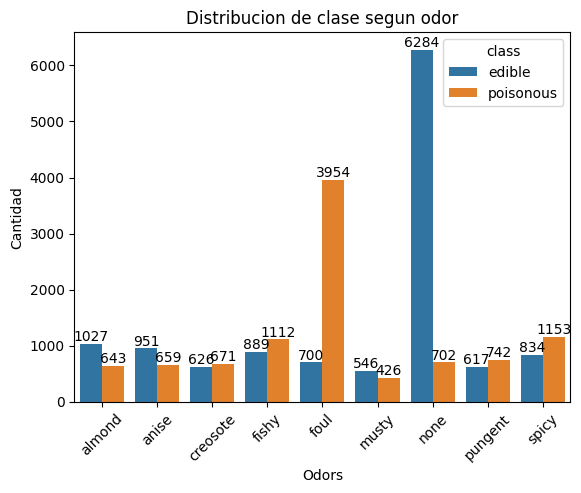

In [14]:
mush = pd.read_csv('mushroom.csv')
clase = {
    'e': 'edible',
    'p': 'poisonous'}
mush['class'] = mush['class'].map(clase)
olor = {
    'a': 'almond',
    'l': 'anise',
    'c': 'creosote',
    'y': 'fishy',
    'f': 'foul',
    'm': 'musty',
    'n': 'none',
    'p': 'pungent',
    's': 'spicy'}
mush['odor'] = mush['odor'].map(olor)
mush_odor = mush[['class', 'odor']].groupby(by=['class','odor']).size().reset_index(name='Cantidad')
print(mush_odor)
ax = sns.barplot(x='odor', y='Cantidad', hue='class', data=mush_odor, estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Distribucion de clase segun odor')
plt.xlabel('Odors')
plt.xticks(rotation=45)
plt.show()

stalk-shape
tapering     12171
enlarging    10341
Name: count, dtype: int64
stalk-root
bulbous    8123
missing    6056
equal      3555
club       2705
rooted     2019
Name: count, dtype: int64
stalk-surface-above-ring
smooth     11040
silky       6250
fibrous     2987
scaly       2201
Name: count, dtype: int64
stalk-surface-below-ring
smooth     10619
silky       6200
fibrous     3087
scaly       2657
Name: count, dtype: int64
stalk-color-above-ring
white       8580
pink        4129
gray        2025
buff        1657
brown       1651
orange      1205
red         1190
cinnamon    1009
yellow       967
Name: count, dtype: int64
stalk-color-below-ring
white       8403
pink        4100
brown       1941
gray        1921
buff        1745
orange      1307
red         1108
cinnamon    1027
yellow      1001
Name: count, dtype: int64


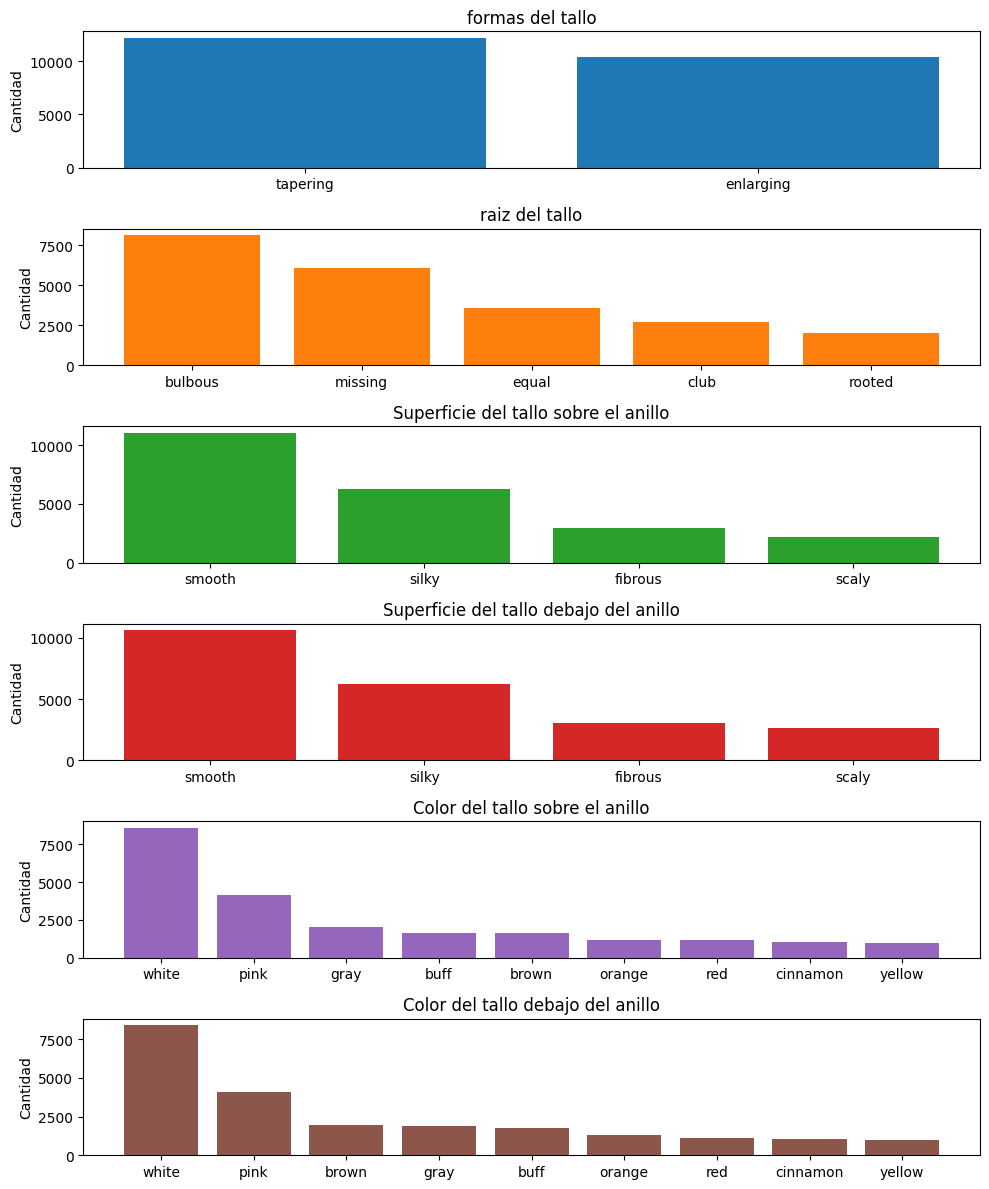

In [19]:
mush = pd.read_csv('mushroom.csv')
forma_tallo = {
    'e': 'enlarging',
    't': 'tapering'}
mush['stalk-shape'] = mush['stalk-shape'].map(forma_tallo)
raiz_tallo = {
    'b': 'bulbous',
    'c': 'club',
    'u': 'cup',
    'e': 'equal',
    'z': 'rhizomorphs',
    'r': 'rooted',
    '?': 'missing'}
mush['stalk-root'] = mush['stalk-root'].map(raiz_tallo)
sup_abo_ring = {
    'f': 'fibrous',
    'y': 'scaly',
    'k': 'silky',
    's': 'smooth'}
mush['stalk-surface-above-ring'] = mush['stalk-surface-above-ring'].map(sup_abo_ring)
sup_bel_ring = {
    'f': 'fibrous',
    'y': 'scaly',
    'k': 'silky',
    's': 'smooth'}
mush['stalk-surface-below-ring'] = mush['stalk-surface-below-ring'].map(sup_bel_ring)
color_abo_ring = {
    'n': 'brown',
    'b': 'buff',
    'c': 'cinnamon',
    'g': 'gray',
    'o': 'orange',
    'p': 'pink',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'}
mush['stalk-color-above-ring'] = mush['stalk-color-above-ring'].map(color_abo_ring)
color_belo_ring = {
    'n': 'brown',
    'b': 'buff',
    'c': 'cinnamon',
    'g': 'gray',
    'o': 'orange',
    'p': 'pink',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'}
mush['stalk-color-below-ring'] = mush['stalk-color-below-ring'].map(color_belo_ring)

shape_counts = mush['stalk-shape'].value_counts()
root_counts = mush['stalk-root'].value_counts()
surface_above_ring_counts = mush['stalk-surface-above-ring'].value_counts()
surface_below_ring_counts = mush['stalk-surface-below-ring'].value_counts()
color_above_ring_counts = mush['stalk-color-above-ring'].value_counts()
color_below_ring_counts = mush['stalk-color-below-ring'].value_counts()
print(shape_counts)
print(root_counts)
print(surface_above_ring_counts)
print(surface_below_ring_counts)
print(color_above_ring_counts)
print(color_below_ring_counts)
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,12))

ax[0].bar(shape_counts.index, shape_counts.values)
ax[0].set_title('formas del tallo')
ax[0].set_ylabel('Cantidad')

ax[1].bar(root_counts.index, root_counts.values, color='C1')
ax[1].set_title('raiz del tallo')
ax[1].set_ylabel('Cantidad')

ax[2].bar(surface_above_ring_counts.index, surface_above_ring_counts.values, color='C2')
ax[2].set_title('Superficie del tallo sobre el anillo')
ax[2].set_ylabel('Cantidad')

ax[3].bar(surface_below_ring_counts.index, surface_below_ring_counts.values, color='C3')
ax[3].set_title('Superficie del tallo debajo del anillo')
ax[3].set_ylabel('Cantidad')

ax[4].bar(color_above_ring_counts.index, color_above_ring_counts.values, color='C4')
ax[4].set_title('Color del tallo sobre el anillo')
ax[4].set_ylabel('Cantidad')

ax[5].bar(color_below_ring_counts.index, color_below_ring_counts.values, color='C5')
ax[5].set_title('Color del tallo debajo del anillo')
ax[5].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()